In [11]:
from gettext import install


import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')
%matplotlib inline
from pylab import *

n = 100 # size of space: n x n
p = 0.1 # probability of initially panicky individuals

def initialize(p):
    global config, nextconfig
    config = zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else 0
    nextconfig = zeros([n, n])

def observe():
    global config, nextconfig
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)

def update(density):
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
                nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config
    d = sum([sum(i) for i in config])/(n*n)
    density.append(d)

#import pycxsimulator
#pycxsimulator.GUI().start(func=[initialize, observe, update])

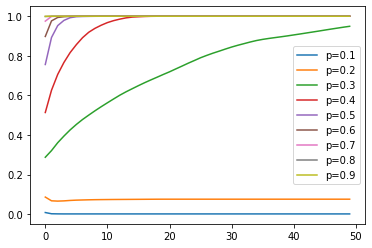

In [18]:
for j in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    density = []
    initialize(p=j)
    for i in range(50):
        update(density)

    plt.plot(range(50), density, label=f'p={j}')
plt.legend()
plt.show()

arround p = 0.3 it starts converging up.